<a href="https://colab.research.google.com/github/dchung1209/CxC-2023-UWaterloo/blob/main/CxC_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Reading Data

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
train_df = pd.read_csv("/content/drive/MyDrive/new_train.csv", index_col=0)
test_df = pd.read_csv("/content/drive/MyDrive/Intact.csv", index_col=0)

In [ ]:
type(train_df)

pandas.core.frame.DataFrame

### Train Set Label Distribution

In [3]:
import matplotlib.pyplot as plt

In [4]:
train_df.shape

(3969, 3)

In [5]:
train_df.head()

,medical_specialty,transcription,labels
0,Emergency Room Reports,"REASON FOR THE VISIT:, Very high PT/INR.,HIST...",0
1,Surgery,"PREOPERATIVE DIAGNOSIS:, Acetabular fracture ...",1
2,Surgery,"NAME OF PROCEDURE,1. Selective coronary angio...",1
3,Radiology,"REFERRING DIAGNOSIS: , Motor neuron disease.,P...",2
4,Emergency Room Reports,"CHIEF COMPLAINT: , Dental pain.,HISTORY OF PRE...",0


In [6]:
test_df.head()

,transcription
0,"PAST MEDICAL CONDITION:, None.,ALLERGIES:, N..."
1,"CURRENT HISTORY:, A 94-year-old female from t..."
2,"TITLE OF PROCEDURE: ,Coronary artery bypass g..."
3,"PROCEDURE: , Bilateral L5, S1, S2, and S3 radi..."
4,"OPERATIVE PROCEDURES: , Colonoscopy and biopsi..."


In [7]:
print(f"the number of N/A values in trascription is: {train_df.transcription.isna().sum()}")

the number of N/A values in trascription is: 0


In [8]:
print(f"the number of N/A values in medical_specialty is: {train_df.medical_specialty.isna().sum()}")

the number of N/A values in medical_specialty is: 0


In [9]:
print(f"the size of data(shape) is: {train_df.shape}")

the size of data(shape) is: (3969, 3)


In [10]:
freq = train_df.groupby('medical_specialty').count().reset_index()[['medical_specialty', 'transcription']].sort_values(by='transcription', ascending=False).rename(columns = {'transcription' : 'frequency'})
freq.head()

,medical_specialty,frequency
38,Surgery,863
5,Consult - History and Phy.,410
3,Cardiovascular / Pulmonary,309
27,Orthopedic,289
33,Radiology,213


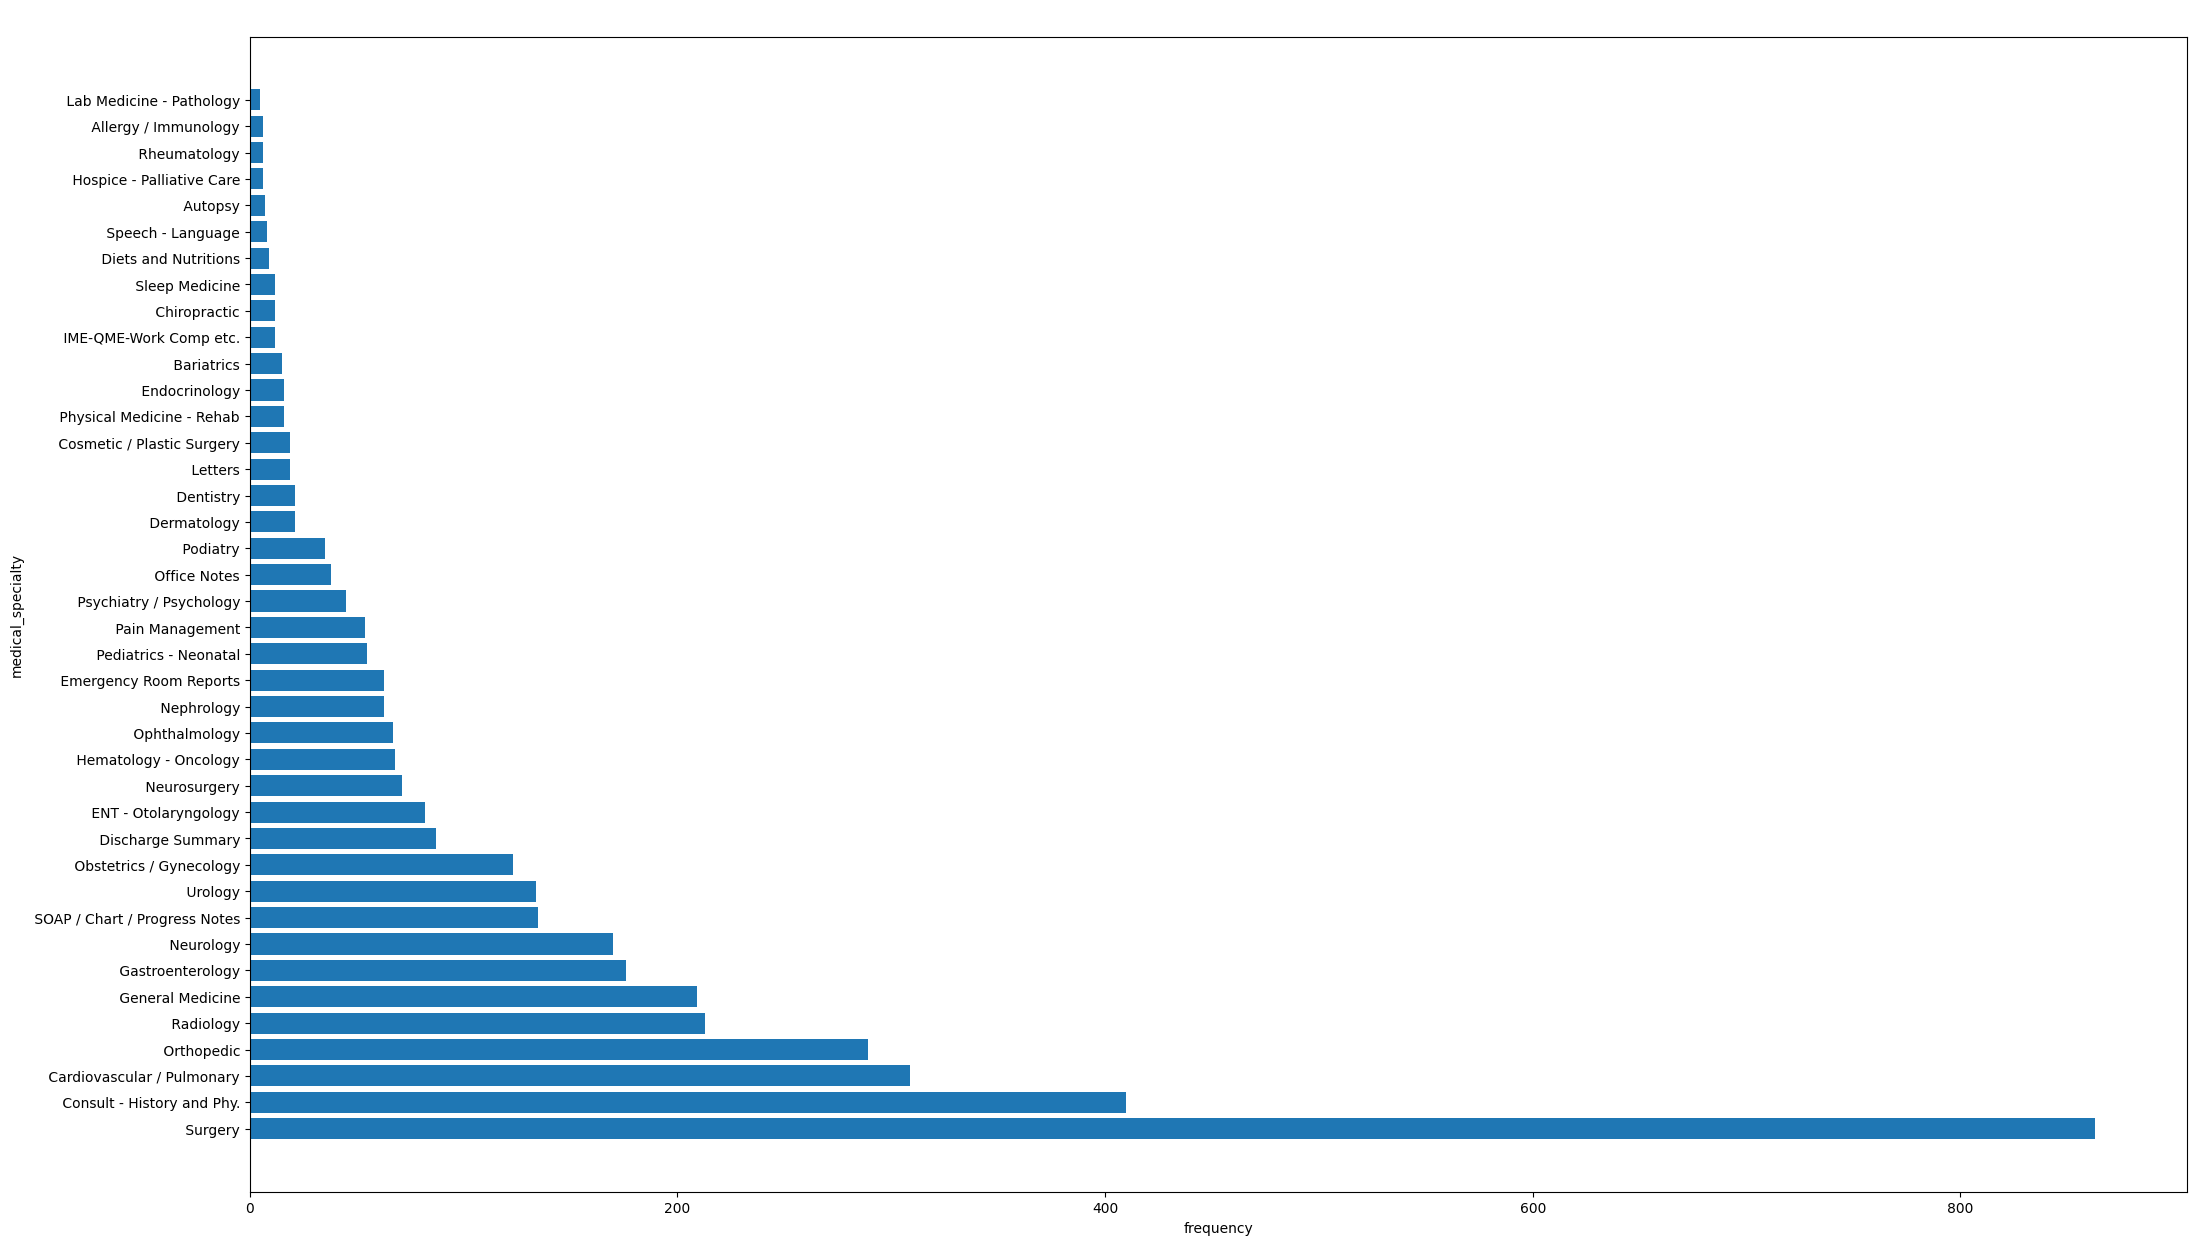

In [11]:
data = freq.frequency.tolist()
df = freq.medical_specialty.tolist()
plt.figure(figsize=(25,15))

font_title = {
         'color': 'white',
         'weight': 'normal',
         'size': 'xx-large'
         }
         
plt.barh(df, data)
plt.title('store inventory')
plt.ylabel('medical_specialty')
plt.xlabel('frequency')
plt.title('medical_specialty frequency', fontdict = font_title)
plt.show()

In [12]:
word = pd.DataFrame({'medical_specialty': train_df['medical_specialty'], 'word_count': train_df["transcription"].apply(lambda n: len(n.split()))})

In [13]:
word.groupby('medical_specialty').mean().reset_index().sort_values(by='word_count', ascending=False).merge(freq, how='inner')

,medical_specialty,word_count,frequency
0,Autopsy,1352.428571,7
1,IME-QME-Work Comp etc.,1230.916667,12
2,Chiropractic,978.666667,12
3,Psychiatry / Psychology,794.622222,45
4,Hospice - Palliative Care,676.166667,6
5,Endocrinology,639.812500,16
6,Neurosurgery,567.577465,71
7,Orthopedic,562.560554,289
8,Emergency Room Reports,561.285714,63
9,Consult - History and Phy.,560.182927,410


### Cleaning

In [15]:
train_df['transcription'][0]

'REASON FOR THE VISIT:,  Very high PT/INR.,HISTORY: , The patient is an 81-year-old lady whom I met last month when she came in with pneumonia and CHF.  She was noticed to be in atrial fibrillation, which is a chronic problem for her.  She did not want to have Coumadin started because she said that she has had it before and the INR has had been very difficult to regulate to the point that it was dangerous, but I convinced her to restart the Coumadin again.  I gave her the Coumadin as an outpatient and then the INR was found to be 12.  So, I told her to come to the emergency room to get vitamin K to reverse the anticoagulation.,PAST MEDICAL HISTORY:,1.  Congestive heart failure.,2.  Renal insufficiency.,3.  Coronary artery disease.,4.  Atrial fibrillation.,5.  COPD.,6.  Recent pneumonia.,7.  Bladder cancer.,8.  History of ruptured colon.,9.  Myocardial infarction.,10.  Hernia repair.,11.  Colon resection.,12.  Carpal tunnel repair.,13.  Knee surgery.,MEDICATIONS:,1.  Coumadin.,2.  Simva

In [16]:
import nltk
from nltk.corpus import stopwords
import re
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
def basic_cleaner(transcription):
  # Lower Case
  transcription = transcription.lower()
  # Remove numbers and special characters
  transcription = re.sub('[^a-zA-Z \n]', '', transcription)
  return transcription

In [18]:
def stop_words_removal(transcription):
  pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
  text = pattern.sub('', transcription)
  return text

In [19]:
train_df['transcription'] = train_df['transcription'].apply(basic_cleaner)
train_df['transcription'] = train_df['transcription'].apply(stop_words_removal)

In [20]:
train_df['transcription'][0]

'reason visit  high ptinrhistory  patient yearold lady met last month came pneumonia chf  noticed atrial fibrillation chronic problem want coumadin started said inr difficult regulate point dangerous convinced restart coumadin gave coumadin outpatient inr found told come emergency room get vitamin k reverse anticoagulationpast medical history  congestive heart failure  renal insufficiency  coronary artery disease  atrial fibrillation  copd  recent pneumonia  bladder cancer  history ruptured colon  myocardial infarction  hernia repair  colon resection  carpal tunnel repair  knee surgerymedications  coumadin  simvastatin  nitrofurantoin  celebrex  digoxin  levothyroxine  vicodin  triamterene hydrochlorothiazide  carvedilolsocial history  smoke drinkphysical examinationgeneral  lady distressvital signs  blood pressure  pulse respirations  temperature heent  head normalneck  supplelungs  clear auscultation percussionheart  murmursabdomen  softextremities  lower extremities edemaassessment 

In [26]:
from wordcloud import WordCloud

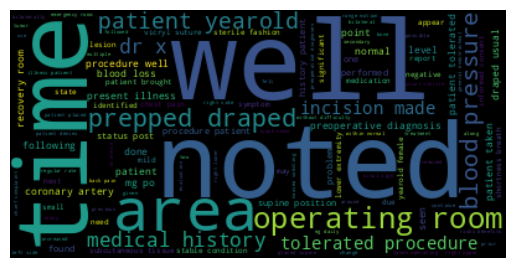

In [27]:
def wordcloud(df):
    wordcloud_ent = WordCloud().generate(' '.join(df['transcription']))
    plt.imshow(wordcloud_ent, interpolation='bilinear')
    plt.axis("off")
    return plt.show()
wordcloud(train_df)

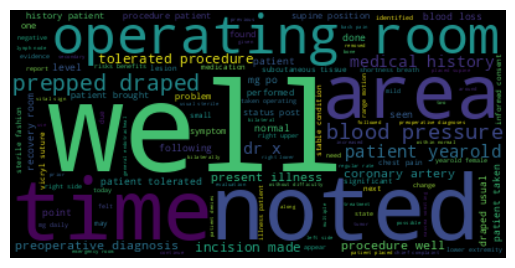

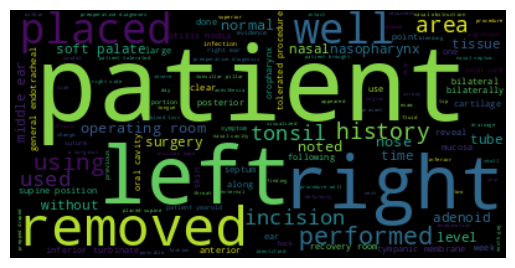

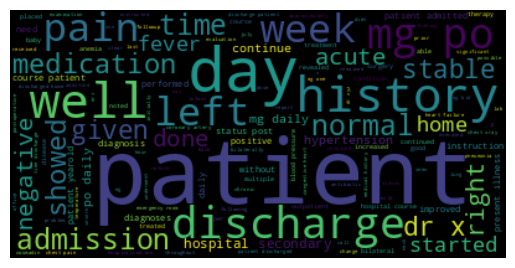

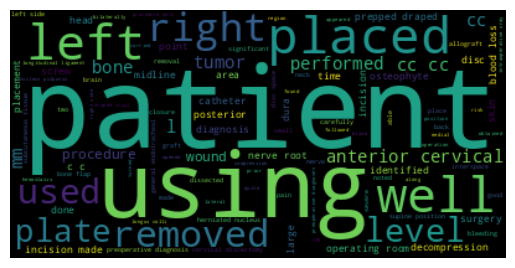

In [28]:
df_ent = train_df.loc[(train_df['medical_specialty'] == ' ENT - Otolaryngology')]
df_dc = train_df.loc[(train_df['medical_specialty'] == ' Discharge Summary')]
df_neu = train_df.loc[(train_df['medical_specialty'] == ' Neurosurgery')]
wordcloud(train_df)
wordcloud(df_ent)
wordcloud(df_dc)
wordcloud(df_neu)

### Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
labels = train_df['medical_specialty'].to_list()
category = train_df['medical_specialty'].unique()

In [ ]:
def tfidf(transcription):
  from sklearn.feature_extraction.text import TfidfVectorizer
  from sklearn.metrics.pairwise import cosine_similarity
  from sklearn.decomposition import PCA
  tfidf = TfidfVectorizer(analyzer='word', stop_words='english', ngram_range=(1, 2), max_df = 0.75, min_df = 0.05, max_features= 500)
  tfidf_matrix  = tfidf.fit_transform(transcription)
  print(f"The size of TFIDF(shape) is : {tfidf_matrix.shape}")
  return tfidf_matrix

In [ ]:
result = tfidf(train_df['transcription'])

The size of TFIDF(shape) is : (3969, 500)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(result, labels, stratify = labels, random_state = 1)  

In [ ]:
clf = LogisticRegression(penalty= 'elasticnet', solver= 'saga', l1_ratio=0.5, random_state=1).fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
y_test_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test , y_test_pred, labels=category))

                                precision    recall  f1-score   support

        Emergency Room Reports       0.00      0.00      0.00        16
                       Surgery       0.42      0.75      0.54       216
                     Radiology       0.30      0.34      0.32        53
                      Podiatry       0.00      0.00      0.00         9
                     Neurology       0.28      0.28      0.28        43
              Gastroenterology       0.42      0.18      0.25        44
                    Orthopedic       0.20      0.19      0.20        72
    Cardiovascular / Pulmonary       0.34      0.31      0.32        77
                    Nephrology       0.50      0.12      0.20        16
          ENT - Otolaryngology       0.33      0.05      0.08        21
              General Medicine       0.18      0.08      0.11        52
         Hematology - Oncology       0.00      0.00      0.00        17
    Cosmetic / Plastic Surgery       0.00      0.00      0.00  

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
freq

,medical_specialty,frequency
38,Surgery,863
5,Consult - History and Phy.,410
3,Cardiovascular / Pulmonary,309
27,Orthopedic,289
33,Radiology,213
15,General Medicine,209
14,Gastroenterology,176
22,Neurology,170
35,SOAP / Chart / Progress Notes,135
39,Urology,134


### Making Inference on the Test Set

In [ ]:
test_df['transcription'] = test_df['transcription'].apply(basic_cleaner)
test_df['transcription'] = test_df['transcription'].apply(stop_words_removal)
y_test_pred = clf.predict(tfidf(test_df['transcription']))

The size of TF-IDF(shape) is : (997, 500)


In [ ]:
from google.colab import files
a = pd.Series(y_test_pred)
a.name = "Predicted"
files.download("Predicted.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>